In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/Banknote-authentication-dataset.csv')
data_copy = data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


In [ ]:
data.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


2  Columns 
1372 rows with no missing values

*   V1 Variance 
*   V2 skewness

Datatypes : float64


#Normilize

In [ ]:
V1 = data['V1']
V2 = data['V2']

V1_mean = V1.mean()
V1_std = V1.std()

V2_mean = V2.mean()
V2_std = V2.std()

In [ ]:
V1.max()

6.8248

In [ ]:
V1.min()

-7.0421

In [ ]:
V2.max()

12.9516

In [ ]:
V2.min()

-13.7731

> V1 **MAX**: 6.8248 **MIN**:-7.0421

> V2 **MAX**: 12.9516 **MIN**:-13.7731




In [ ]:
print(V1_mean,V1_std)
print(V2_mean,V2_std)

0.43373525728862977 2.8427625862451675
1.9223531209912554 5.8690467435803795


> domain standardisation: the data points will all lie
between 0 (smallest one) and 1 (largest one)

In [ ]:
minimal = np.min(data, 0)
maximal = np.max(data, 0)
normed = (data - minimal) / (maximal - minimal)


In [ ]:
V1 = normed['V1']
V2 = normed['V2']

V1_mean = V1.mean()
V1_std = V1.std()

V2_mean = V2.mean()
V2_std = V2.std()

In [ ]:
print(V1_mean,V1_std)
print(V2_mean,V2_std)

0.5391136632764809 0.20500346769971411
0.5873013774145724 0.2196113237409729


In [ ]:
a = [[V1_mean,V1_std],[V2_mean,V2_std]]
normed_mstd = np.array(a)
normed_mstd        #mean,std array

array([[0.53911366, 0.20500347],
       [0.58730138, 0.21961132]])

In [ ]:
normed.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.539114,0.587301
std,0.205003,0.219611
min,0.000000,0.000000
25%,0.379977,0.451451
50%,0.543617,0.602168
75%,0.711304,0.770363
max,1.000000,1.000000


#Main Plot

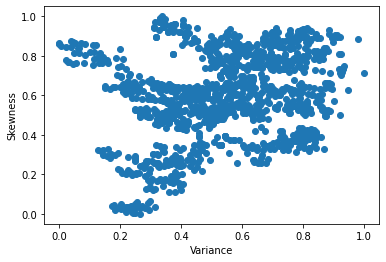

In [ ]:
import matplotlib.pyplot as plt 

normed_array = np.array(normed)

plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.scatter(normed_array[:,0],normed_array[:,1])
plt.show()

#OutLIERS


> MEAN ELLIPSE

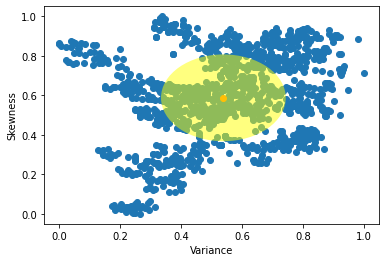

In [ ]:
import matplotlib.patches as patches

mean = np.mean(normed_array,0)
std_dev = np.std(normed_array,0)


ellipse = patches.Ellipse([mean[0],mean[1]],std_dev[0]*2,std_dev[1]*2,alpha=0.5,facecolor='yellow')

fig,graph = plt.subplots()

graph.scatter(normed_array[:,0],normed_array[:,1])
graph.scatter(mean[0],mean[1])
graph.add_patch(ellipse)
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()


Outliers - the points which std is out of range of x2/x3 of it's mean value

In [ ]:
std_dev_x2 = std_dev*2
std_dev_x3 = std_dev*3
print(std_dev_x2,std_dev_x3)

[0.40985749 0.43906255] [0.61478623 0.65859383]


In [ ]:
std_dev_x2[0] #std V1


0.4098574887258287

In [ ]:
std_dev_x2[1] #std V2

0.43906255174217057

Let's make a filter


In [ ]:
normed.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.539114,0.587301
std,0.205003,0.219611
min,0.000000,0.000000
25%,0.379977,0.451451
50%,0.543617,0.602168
75%,0.711304,0.770363
max,1.000000,1.000000


In [ ]:
normed_mstd

array([[0.53911366, 0.20500347],
       [0.58730138, 0.21961132]])

#Points which values less than 2X std

Both two values should be in range of 2x standart deviation

In [ ]:
fltrd_x2 =  normed[(normed['V1'] <= std_dev_x2[0] ) & (normed['V2'] <= std_dev_x2[1])]
fltrd_x2.describe()

,V1,V2
count,167.000000,167.000000
mean,0.308896,0.209124
std,0.073989,0.105816
min,0.126041,0.000000
25%,0.249320,0.154780
50%,0.322495,0.239875
75%,0.376566,0.273827
max,0.407690,0.437165


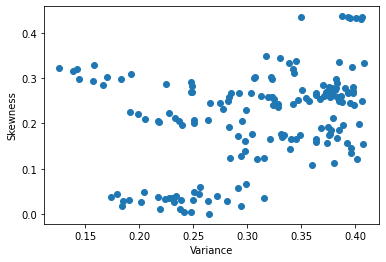

In [ ]:
fltrd_x2_array = np.array(fltrd_x2)

plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.scatter(fltrd_x2_array[:,0],fltrd_x2_array[:,1])
plt.show()


#Points which values are bigger than 2X std -- they are outliers

One of values are bigger than 2x standart deviation

In [ ]:
fltrd_x2_2 =  normed[(normed['V1'] >= std_dev_x2[0] ) & (normed['V2'] >= std_dev_x2[1])]
fltrd_x2_2.describe()

,V1,V2
count,785.000000,785.000000
mean,0.642642,0.690736
std,0.138083,0.136784
min,0.411101,0.440110
25%,0.529123,0.569338
50%,0.626463,0.663570
75%,0.761360,0.812002
max,1.000000,0.946031


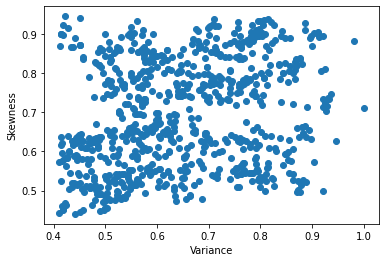

In [ ]:
fltrd_x2_2_array = np.array(fltrd_x2_2)

plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.scatter(fltrd_x2_2_array[:,0],fltrd_x2_2_array[:,1])
plt.show()


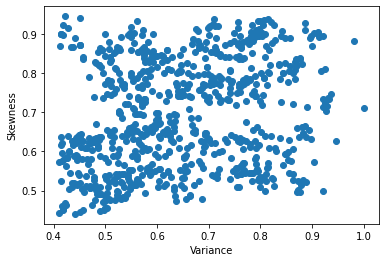

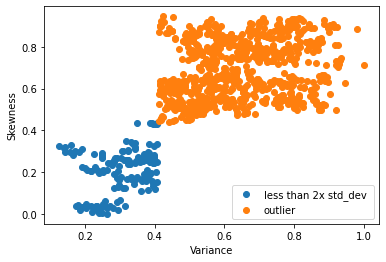

In [ ]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.scatter(fltrd_x2_2_array[:,0],fltrd_x2_2_array[:,1])
plt.show()

plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.scatter(fltrd_x2_array[:,0],fltrd_x2_array[:,1])
plt.scatter(fltrd_x2_2_array[:,0],fltrd_x2_2_array[:,1])
plt.legend(["less than 2x std_dev ", "outlier"])
plt.show()

#Points which values are less than 3X std

In [ ]:
fltrd_x3 =  normed[(normed['V1'] <= std_dev_x3[0] ) & (normed['V2'] <= std_dev_x3[1])]
fltrd_x3.describe()

,V1,V2
count,596.000000,596.000000
mean,0.402985,0.440951
std,0.112604,0.175990
min,0.126041,0.000000
25%,0.324777,0.289430
50%,0.399812,0.504026
75%,0.490118,0.586355
max,0.612963,0.658148


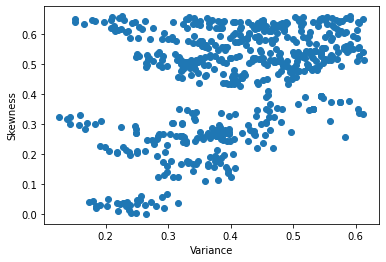

In [ ]:
fltrd_x3_array = np.array(fltrd_x3)

plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.scatter(fltrd_x3_array[:,0],fltrd_x3_array[:,1])
plt.show()

#Points where one  of values or two are bigger  than 3X std -- OUTLIERS


In [ ]:
fltrd_x3_2 =  normed[(normed['V1'] >= std_dev_x3[0] ) & (normed['V2'] >= std_dev_x3[1])]
fltrd_x3_2.describe()

,V1,V2
count,251.000000,251.000000
mean,0.756779,0.812691
std,0.086375,0.071324
min,0.617305,0.661167
25%,0.689624,0.754819
50%,0.757285,0.808671
75%,0.808796,0.876811
max,1.000000,0.938368


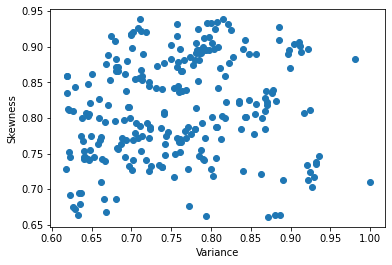

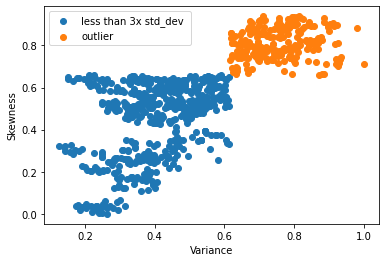

In [ ]:
fltrd_x3_2_array = np.array(fltrd_x3_2)

plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.scatter(fltrd_x3_2_array[:,0],fltrd_x3_2_array[:,1])
plt.show()


plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.scatter(fltrd_x3_array[:,0],fltrd_x3_array[:,1])
plt.scatter(fltrd_x3_2_array[:,0],fltrd_x3_2_array[:,1])
plt.legend(["less than 3x std_dev ", "outlier"])
plt.show()

#**Compare of 2xstd and 3xstd outliers graphics**


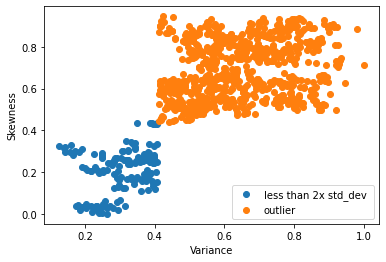

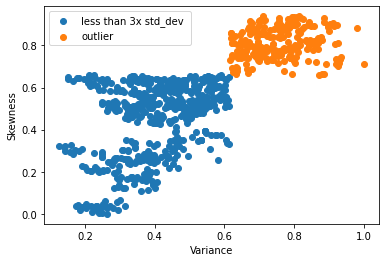

In [ ]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.scatter(fltrd_x2_array[:,0],fltrd_x2_array[:,1])
plt.scatter(fltrd_x2_2_array[:,0],fltrd_x2_2_array[:,1])
plt.legend(["less than 2x std_dev ", "outlier"])
plt.show()

plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.scatter(fltrd_x3_array[:,0],fltrd_x3_array[:,1])
plt.scatter(fltrd_x3_2_array[:,0],fltrd_x3_2_array[:,1])
plt.legend(["less than 3x std_dev ", "outlier"])
plt.show()

#KMeans:

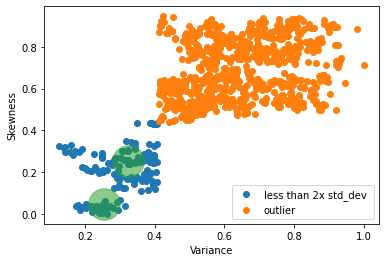

In [ ]:
from sklearn.cluster import KMeans

plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.scatter(fltrd_x2_array[:,0],fltrd_x2_array[:,1])
plt.scatter(fltrd_x2_2_array[:,0],fltrd_x2_2_array[:,1])

plt.legend(["less than 2x std_dev ", "outlier"])

km_res = KMeans(n_clusters=2).fit(fltrd_x2_array)
clusters = km_res.cluster_centers_

plt.scatter(clusters[:,0],clusters[:,1],s = 1000,alpha=0.55)

plt.show()

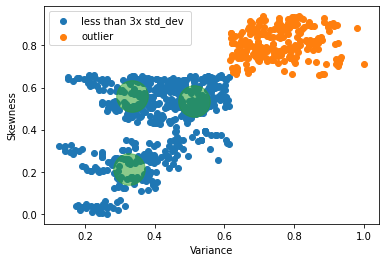

In [ ]:
from sklearn.cluster import KMeans

plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.scatter(fltrd_x3_array[:,0],fltrd_x3_array[:,1])
plt.scatter(fltrd_x3_2_array[:,0],fltrd_x3_2_array[:,1])
plt.legend(["less than 3x std_dev ", "outlier"])


km_res = KMeans(n_clusters=3).fit(fltrd_x3_array)
clusters = km_res.cluster_centers_

plt.scatter(clusters[:,0],clusters[:,1],s = 1000,alpha=0.55)

plt.show()

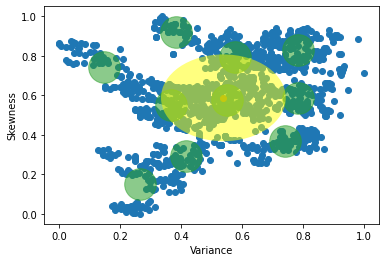

In [ ]:
ellipse = patches.Ellipse([mean[0],mean[1]],std_dev[0]*2,std_dev[1]*2,alpha=0.5,facecolor='yellow')

fig,graph = plt.subplots()

graph.scatter(normed_array[:,0],normed_array[:,1])
graph.scatter(mean[0],mean[1])
graph.add_patch(ellipse)

km_res = KMeans(n_clusters=10).fit(normed_array)
clusters = km_res.cluster_centers_

plt.scatter(clusters[:,0],clusters[:,1],s = 1000,alpha=0.55)
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()


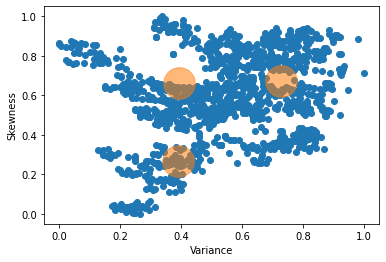

In [ ]:
plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.scatter(normed_array[:,0],normed_array[:,1])

km_res = KMeans(n_clusters=3).fit(normed_array)
clusters = km_res.cluster_centers_

plt.scatter(clusters[:,0],clusters[:,1],s = 1000,alpha=0.55)

plt.show()

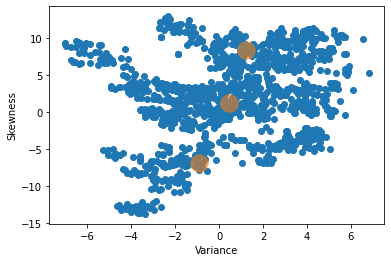

In [ ]:
data_array = np.array(data)

plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.scatter(data_array[:,0],data_array[:,1])

km_res = KMeans(n_clusters=3).fit(data)
clusters = km_res.cluster_centers_

plt.scatter(clusters[:,0],clusters[:,1],s = 300,alpha=0.55)

plt.savefig('piewewc.png')
plt.show()
